In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np 
 


In [3]:
df= pd.read_csv("zomato.csv")
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Initial EDA

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# Data Preprocessing


## Before we can use this dataset, we need to do Data Preprocessing which include:¶
## Data Cleaning
## Data Manipulation

In [9]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

## As we can see there is ',' on the approx_cost(for two people), it actually indicates thousand for the price. But we can not use that ',' for our data, so we will need to eliminate that ','

In [10]:
df['approx_cost(for two people)'] = (df['approx_cost(for two people)'].str.replace(',','')).astype('float64')

In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

## Rate values shown above shows that the range of rating of each restaurant from 0-5, for example 4.1/5 indicates the rating of a restaurant is 4.1 out of 5. But by using /5 inside our data, it will make our data messy. To make our data more clean we need to eliminate that /5 and leave the value before as the rating of a restaurant

In [17]:
df['rate'] = df['rate'].replace('NEW',np.nan)
df['rate'] = df['rate'].replace('-',np.nan)
df['rate'] = (df['rate'].replace('/5','')).astype('float64')

In [18]:
df.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


## Duplicate Data Handling

In [19]:
len(df[df.duplicated()])

0


## With the code above, we know that there is no duplicate data inside our dataset, so we do not need to do anything about it

In [22]:
df.isnull().sum().sort_values(ascending = False)

dish_liked                     28078
rate                           10052
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

In [23]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

dish_liked                     0.542916
rate                           0.194365
phone                          0.023358
approx_cost(for two people)    0.006690
rest_type                      0.004389
cuisines                       0.000870
location                       0.000406
listed_in(type)                0.000000
menu_item                      0.000000
reviews_list                   0.000000
url                            0.000000
address                        0.000000
votes                          0.000000
book_table                     0.000000
online_order                   0.000000
name                           0.000000
listed_in(city)                0.000000
dtype: float64


## As we see from the percentage of missing values, 'dish_liked' has more than 50% missing values which can effect our dataset badly. We need to drop that data from our dataset to make our Data better. 'rate' that has around 19% of missing values, we will just fill that missing values with the median of the restaurant's rating. For columns that have missing values below 1% we will just drop it

In [24]:
df.drop('dish_liked',axis = 1, inplace = True)

In [25]:
df.dropna(subset = ['cuisines', 'rest_type', 'approx_cost(for two people)'],inplace = True)

In [26]:
df.rate.fillna(df.rate.median(), inplace = True)

In [27]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

phone                          0.01699
url                            0.00000
address                        0.00000
name                           0.00000
online_order                   0.00000
book_table                     0.00000
rate                           0.00000
votes                          0.00000
location                       0.00000
rest_type                      0.00000
cuisines                       0.00000
approx_cost(for two people)    0.00000
reviews_list                   0.00000
menu_item                      0.00000
listed_in(type)                0.00000
listed_in(city)                0.00000
dtype: float64

## Then, we can see that this dataset has column or data that we do not neet to use for analyzing this dataset and making a prediction using this dataset. That column or data are 'phone', 'url', 'address', 'name', 'reviews_list', and 'menu_item'. So we will just drop that data

In [28]:
to_remove = ['url','address','name','phone','reviews_list','menu_item']

df.drop(to_remove, axis = 1, inplace = True)

In [29]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

online_order                   0.0
book_table                     0.0
rate                           0.0
votes                          0.0
location                       0.0
rest_type                      0.0
cuisines                       0.0
approx_cost(for two people)    0.0
listed_in(type)                0.0
listed_in(city)                0.0
dtype: float64

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51148 non-null  object 
 1   book_table                   51148 non-null  object 
 2   rate                         51148 non-null  float64
 3   votes                        51148 non-null  int64  
 4   location                     51148 non-null  object 
 5   rest_type                    51148 non-null  object 
 6   cuisines                     51148 non-null  object 
 7   approx_cost(for two people)  51148 non-null  float64
 8   listed_in(type)              51148 non-null  object 
 9   listed_in(city)              51148 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


## Now on, we obtained clean dataset from what we have already done before

# Data Manipulation
## To make our dataset even better, we then manipulate our data

## Feature Engineering

In [32]:
df['numoftype'] = df.rest_type.str.count(',') + 1
df['numofcuisines'] = df.cuisines.str.count(',') + 1

In [33]:
df['numoftype'].fillna(1,inplace = True)
df['numofcuisines'].fillna(1,inplace = True)

In [34]:
tresh = df.rate.median()

## For determining whether a restaurant is a successful restaurant or not, we use the median of restaurant rates as our threshold. If a restaurant has rating more than the threshold, we will consider that restaurant is a successfull restaurant

## Build the target from rate
# we have tried to use 3 as our treshold but the target output is imbalanced so we use 3.5/3.6 as our treshold


In [35]:
df['success'] = 0
df.loc[df['rate'] >= tresh, 'success'] = 1

## For the data that are considered as categorical type, we will encode it because when we want to analyze the data and making a prediction using this dataset. We can not use string data type to be used as a input of the model, so the data that has categorical value will be encoded.

In [36]:
to_encode = ['online_order','book_table','listed_in(type)','listed_in(city)']
encoder = LabelEncoder()
df[to_encode] = df[to_encode].apply(encoder.fit_transform)

# Final Dataset

In [37]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),numoftype,numofcuisines,success
0,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,0,1,1,3,1
1,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,0,1,1,3,1
2,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,0,1,2,3,1
3,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,0,1,1,2,1
4,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,0,1,1,2,1


## Prediction

## Feature Selection

In [38]:
df.corr()['success'].abs().sort_values(ascending = False)

success                        1.000000
rate                           0.754530
book_table                     0.240257
approx_cost(for two people)    0.205851
votes                          0.203685
numofcuisines                  0.097806
numoftype                      0.088385
listed_in(type)                0.013352
online_order                   0.009843
listed_in(city)                0.001149
Name: success, dtype: float64

## Later on, the features that we will use for making prediction using our model are 'book_table', 'approx_cost(for two people)', 'votes', 'numberofcuisines', and 'numoftype'.     We do not use data after 'numoftype' as we considered it to be too low. The correllation between 'success' and 'rate' are too high, so we do not use it as our feature as it will affect our prediction negatively

In [39]:
feature = ['book_table', 'approx_cost(for two people)', 'votes', 'numofcuisines','numoftype']

In [40]:
x = df[feature]
y = df['success']

In [41]:
x.isnull().sum()

book_table                     0
approx_cost(for two people)    0
votes                          0
numofcuisines                  0
numoftype                      0
dtype: int64

# Gaining Insights

## To start the Gaining Insights section, to make sure we get to the root of the source of a successfull restaurant seeing from the Rate we will start with the first Question which is 'What makes a restaurant has a good rating?'¶

## Now, this graph of feature importance show us that votes are so influential in getting good Rate, but we will still dig in to the data to see whether the feature importance graph is true or not


<AxesSubplot:ylabel='Frequency'>

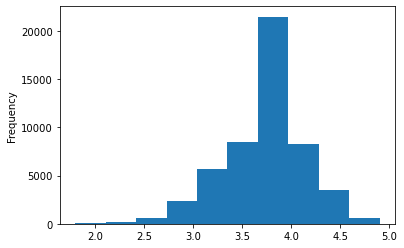

In [42]:
df['rate'].plot(kind='hist')

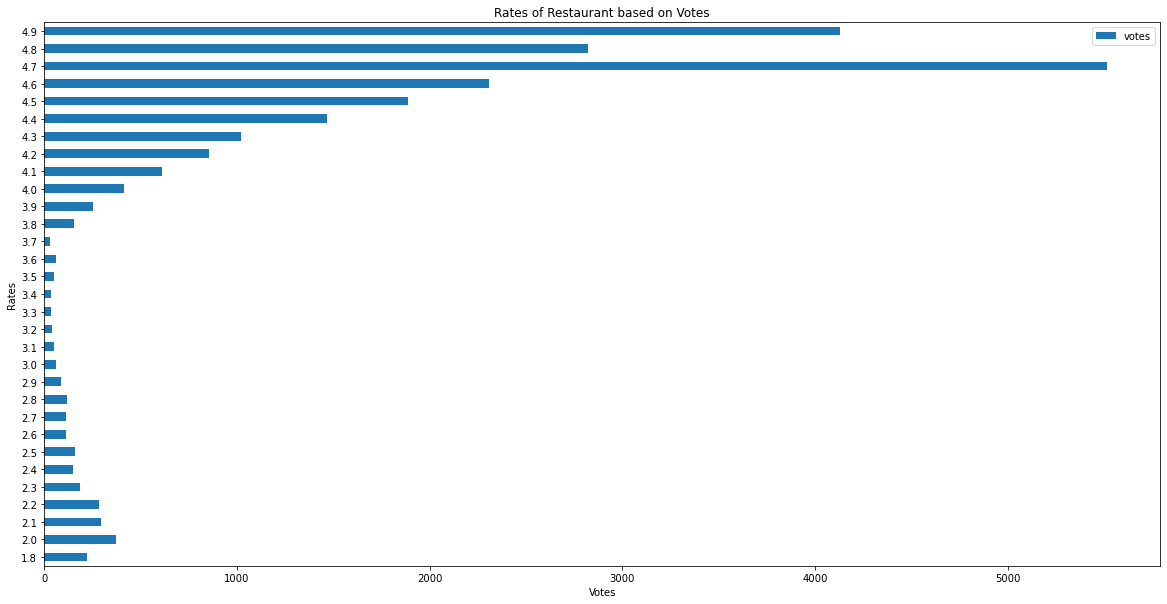

In [44]:
df.groupby(['rate'])[['votes']].mean().plot(kind='barh', figsize=(20,10))
plt.title('Rates of Restaurant based on Votes')
plt.xlabel('Votes')
plt.ylabel('Rates')
plt.show()

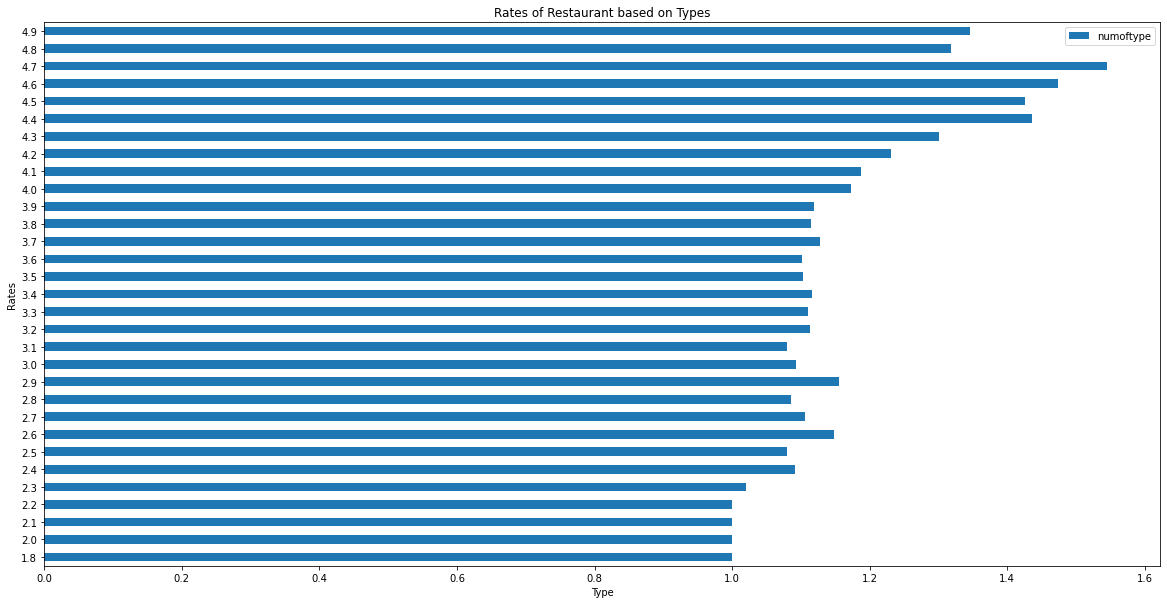

In [45]:
df.groupby(['rate'])[['numoftype']].mean().plot(kind='barh', figsize=(20,10))
plt.title('Rates of Restaurant based on Types')
plt.xlabel('Type')
plt.ylabel('Rates')
plt.show() 

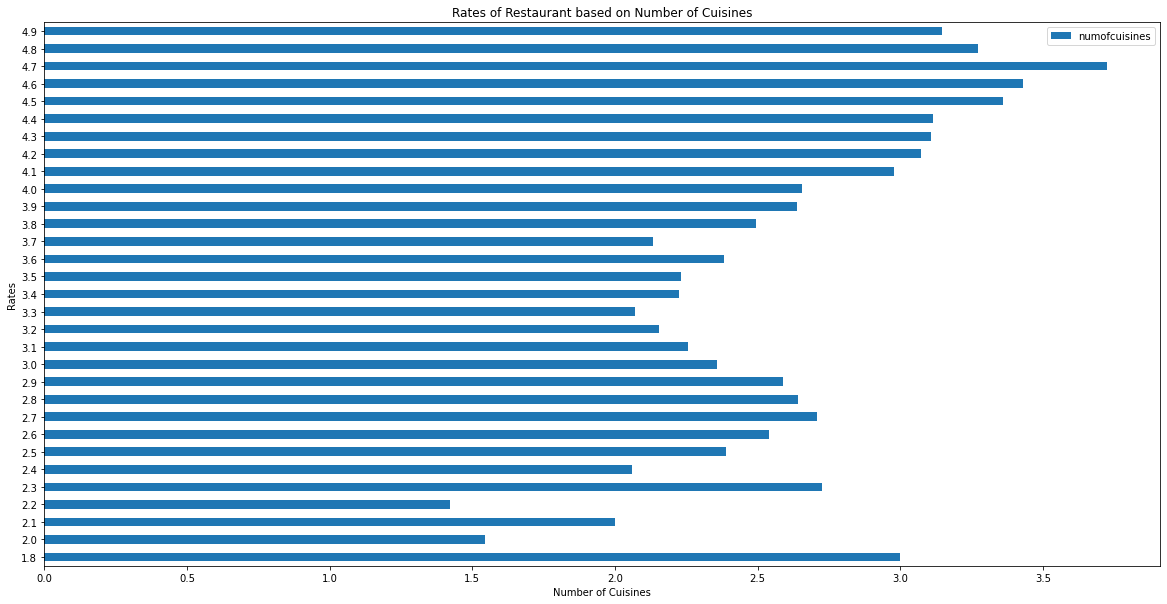

In [46]:
df.groupby(['rate'])[['numofcuisines']].mean().plot(kind='barh', figsize=(20,10))
plt.title('Rates of Restaurant based on Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rates')
plt.show()

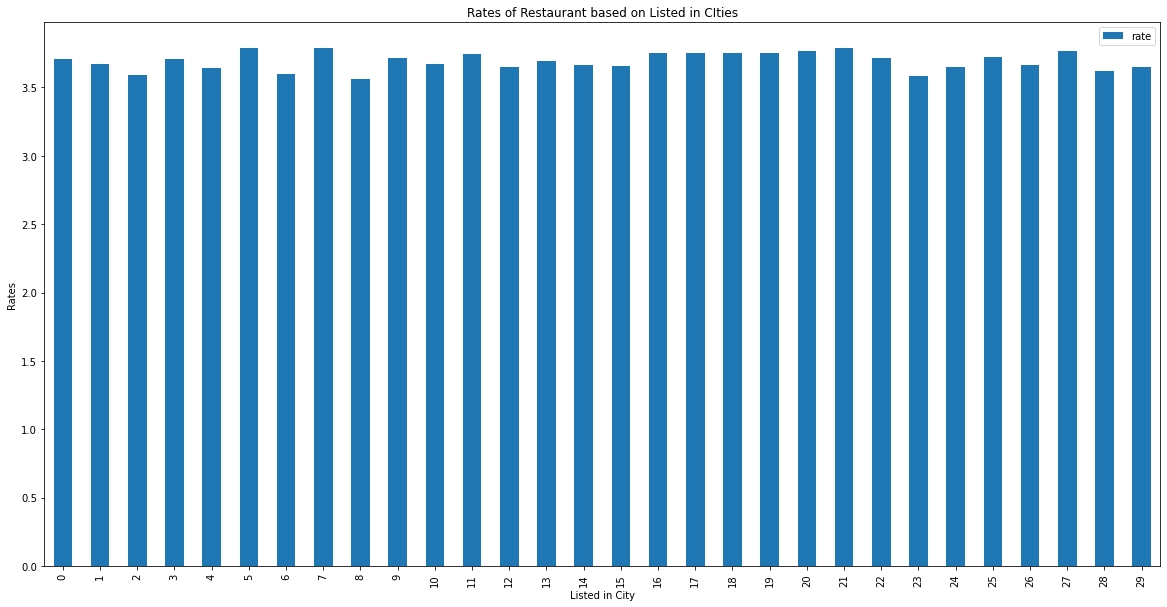

In [47]:
df.groupby(['listed_in(city)'])[['rate']].mean().plot(kind='bar', figsize=(20,10))
plt.title('Rates of Restaurant based on Listed in CIties')
plt.xlabel('Listed in City')
plt.ylabel('Rates')
plt.show()

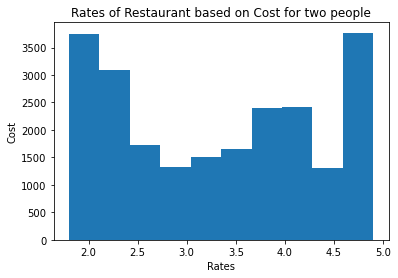

In [49]:
plt.hist(df['rate'].unique(), weights = df.groupby(['rate'])[['approx_cost(for two people)']].mean().values, bins = 10)
plt.title('Rates of Restaurant based on Cost for two people')
plt.xlabel('Rates')
plt.ylabel('Cost')
plt.show()

## As we see from the graphs above, we can conclude that it is true that what affect Rate the most is Votes. We can see it from graphs other than relationship between Votes and Rate, the graph have no huge different from each of the Rate. Even though there is some that have a huge different but it do not tells us it has huge impact for the Rate



## It brings us to the 2nd question, which is 'What makes a restaurant obtain a huge amount of votes?'


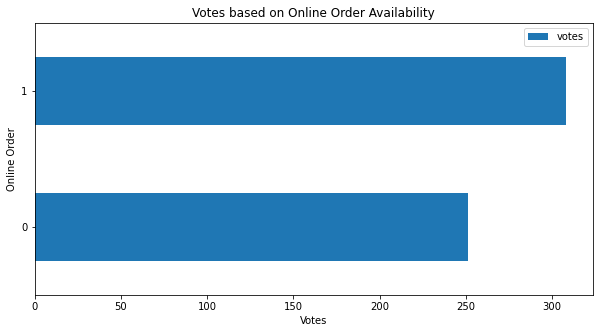

In [50]:
df.groupby(['online_order'])[['votes']].mean().plot(kind='barh', figsize=(10,5))
plt.title('Votes based on Online Order Availability')
plt.xlabel('Votes')
plt.ylabel('Online Order')
plt.show()

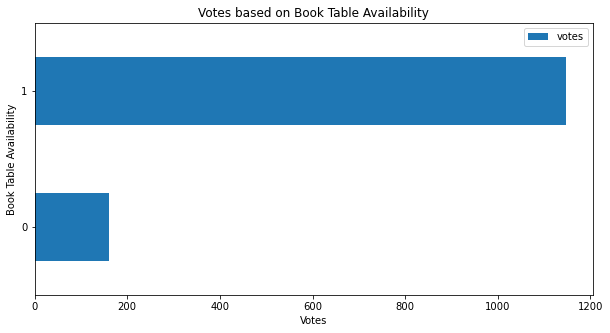

In [51]:
df.groupby(['book_table'])[['votes']].mean().plot(kind='barh', figsize=(10,5))
plt.title('Votes based on Book Table Availability')
plt.xlabel('Votes')
plt.ylabel('Book Table Availability')
plt.show()

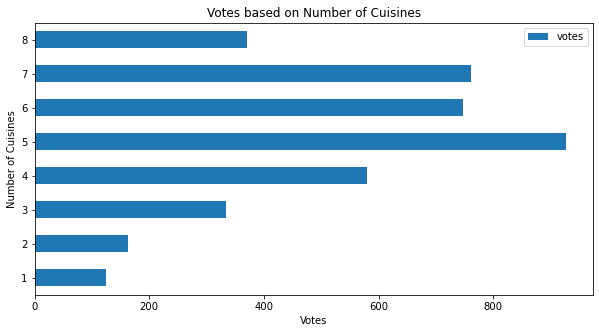

In [52]:
df.groupby(['numofcuisines'])[['votes']].mean().plot(kind='barh', figsize=(10,5))
plt.title('Votes based on Number of Cuisines')
plt.xlabel('Votes')
plt.ylabel('Number of Cuisines')
plt.show() 

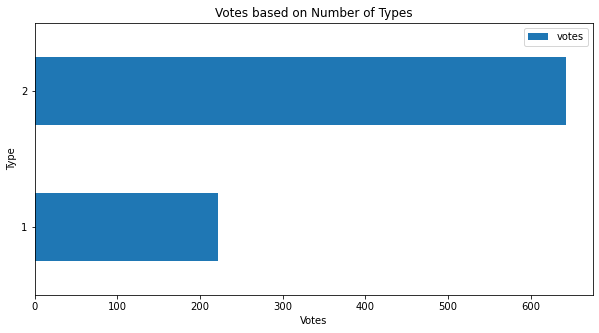

In [53]:
df.groupby(['numoftype'])[['votes']].mean().plot(kind='barh', figsize=(10,5))
plt.title('Votes based on Number of Types')
plt.xlabel('Votes')
plt.ylabel('Type')
plt.show()

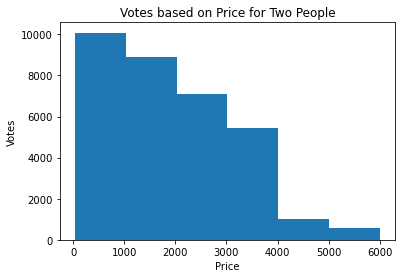

In [54]:
plt.hist(x = df['approx_cost(for two people)'].unique(), weights = df.groupby(['approx_cost(for two people)'])[['votes']].mean().values, bins = 6)
plt.title('Votes based on Price for Two People')
plt.xlabel('Price')
plt.ylabel('Votes')
plt.show()

## From the graphs above we can obtain a conclusion of what affect a huge amount of Votes are the Availability to Book Table, Number Types, and The Approx Cost for Two People


C:\Users\bhaku\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

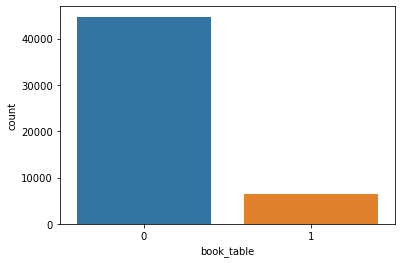

In [55]:
sns.countplot(df.book_table)

In [56]:
df.book_table.value_counts(normalize = True)

0    0.873915
1    0.126085
Name: book_table, dtype: float64

C:\Users\bhaku\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

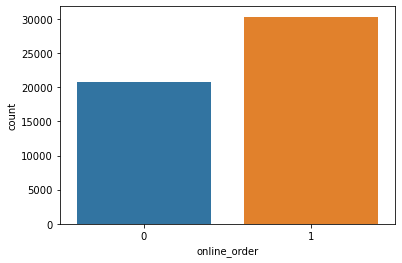

In [57]:
sns.countplot(df.online_order)

In [58]:
df.online_order.value_counts(normalize = True)

1    0.592614
0    0.407386
Name: online_order, dtype: float64

<AxesSubplot:xlabel='count', ylabel='listed_in(city)'>

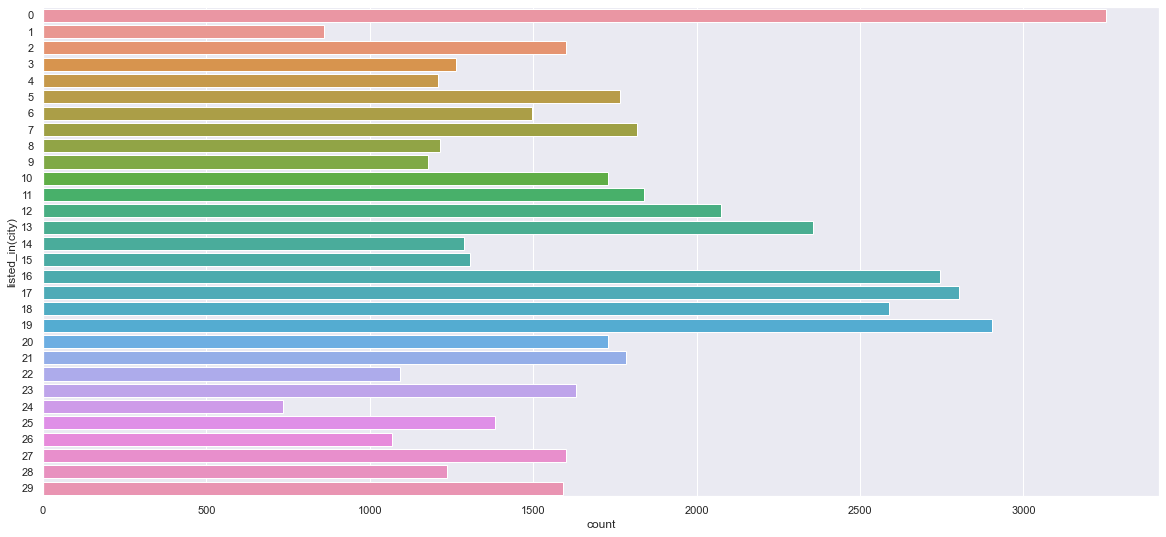

In [59]:
sns.set(rc={'figure.figsize':(20,9)})
sns.countplot(y = df['listed_in(city)'])

C:\Users\bhaku\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='listed_in(type)', ylabel='count'>

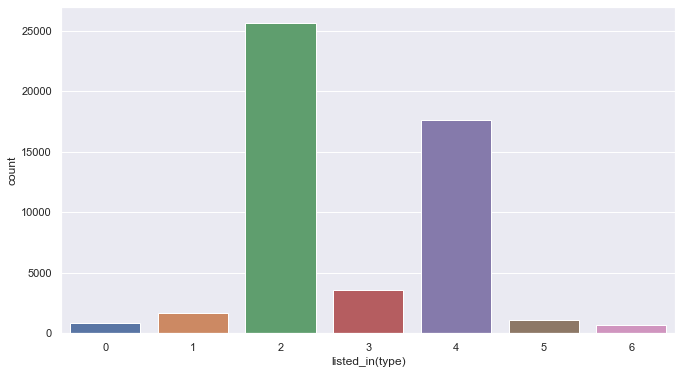

In [60]:
sns.set(rc={'figure.figsize':(11,6)})
sns.countplot(df['listed_in(type)'])

## Single Variable Z-test

In [61]:
a=df['approx_cost(for two people)']
a.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51148 non-null  int32  
 1   book_table                   51148 non-null  int32  
 2   rate                         51148 non-null  float64
 3   votes                        51148 non-null  int64  
 4   location                     51148 non-null  object 
 5   rest_type                    51148 non-null  object 
 6   cuisines                     51148 non-null  object 
 7   approx_cost(for two people)  51148 non-null  float64
 8   listed_in(type)              51148 non-null  int32  
 9   listed_in(city)              51148 non-null  int32  
 10  numoftype                    51148 non-null  int64  
 11  numofcuisines                51148 non-null  int64  
 12  success                      51148 non-null  int64  
dtypes: float64(2), i

In [62]:
import random 
n=  (random.sample(list(a), 1000))
print (n)

[950.0, 750.0, 500.0, 500.0, 700.0, 150.0, 200.0, 400.0, 700.0, 400.0, 400.0, 300.0, 1800.0, 800.0, 300.0, 250.0, 400.0, 400.0, 400.0, 300.0, 100.0, 400.0, 1400.0, 400.0, 200.0, 500.0, 250.0, 1600.0, 350.0, 400.0, 700.0, 300.0, 200.0, 550.0, 1200.0, 800.0, 1000.0, 200.0, 1400.0, 400.0, 1200.0, 300.0, 400.0, 500.0, 1200.0, 500.0, 300.0, 400.0, 200.0, 1000.0, 1500.0, 600.0, 2100.0, 200.0, 300.0, 600.0, 1000.0, 500.0, 500.0, 400.0, 250.0, 600.0, 400.0, 300.0, 500.0, 400.0, 600.0, 300.0, 250.0, 1600.0, 300.0, 200.0, 500.0, 450.0, 750.0, 600.0, 400.0, 3000.0, 800.0, 800.0, 700.0, 400.0, 350.0, 1000.0, 300.0, 300.0, 300.0, 300.0, 800.0, 500.0, 200.0, 400.0, 1100.0, 1700.0, 500.0, 600.0, 900.0, 400.0, 1800.0, 800.0, 800.0, 1300.0, 300.0, 650.0, 1400.0, 600.0, 800.0, 300.0, 100.0, 1300.0, 550.0, 800.0, 200.0, 100.0, 350.0, 500.0, 400.0, 400.0, 600.0, 1200.0, 550.0, 850.0, 800.0, 300.0, 650.0, 600.0, 350.0, 1000.0, 600.0, 300.0, 650.0, 800.0, 500.0, 500.0, 300.0, 200.0, 300.0, 300.0, 450.0, 150

In [63]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['approx_cost(for two people)'])
print(float(pval))

alpha = 0.05

if pval<=alpha:
    
    print('Conclusion','n','Since p-value(=%f)'%pval,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that there is no significant mean difference cost for table of  two people . 

%.2f level of significance'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%pval,'>','alpha(=%.2f)'%alpha,
           '''We do not reject the null hypothesis H0.
So we conclude that there is   significant mean difference in cost of two  ''')
   

0.0
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. 

So we conclude that there is no significant mean difference cost for table of  two people . 

0.05 level of significance


In [64]:
ztest ,pval1 = stests.ztest(df['rate'], x2=df['votes'])
print(float(pval1))
if pval<0.05:
    print("Null  hypothesis Rejected , The votes obtained are dependent on rates gained by the restaurant ")
else:
    print("Null Hypothesis Accpeted , the votes are indepented of rates gained by the restaurant ")

0.0
Null  hypothesis Rejected , The votes obtained are dependent on rates gained by the restaurant 


 ## chi Square Testing                                                                                                                       H0 : Booking of table and Online order are independent of each other.                                        H1: Booking of table and Online order are dependent of each other.


In [66]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(df['online_order'], df['book_table'])
contigency

c, p, dof, expected = chi2_contingency(contigency)
p

0.659251887852286

# Conclusion:


1 - A restaurant must be able to reserve a table because it can be seen from the graph plot above, it is evident that the ratings of restaurants that can book a table differ greatly from those who cannot
2 -Although Online Ordering doesn't seem to have much difference, it's a step better for a restaurant to be ordered online because it can increase the number of votes
3-The type of restaurant is also not only 1, a restaurant must have more than 1 type because it appears that a restaurant that has more than 1 has more votes
4- Affordable prices means high votes, and high prices meaning  less votes, therefore to build a considered successfull restaurant, one must built it with affordable prices to pay
High Votes = High Rate
so our main concern to be considered as a successfull restaurant are getting high number of vote